In [15]:
# Pandas library is used for handling tabular data
import pandas as pd

# NumPy is used for handling numerical series operations (addition, multiplication, and ...)

import numpy as np
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_car = pd.read_csv('CarPrice_data.csv')
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df_car.shape 

(205, 26)

In [4]:
df_car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df_car.duplicated().sum()

0

In [8]:
df_car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df_car.CarName.unique() 

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [10]:
df_car.columns[df_car.dtypes == 'object']

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

## Univariate Analysis 

In [12]:
print(df_car['enginetype'].value_counts())

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enginetype', ylabel='count'>

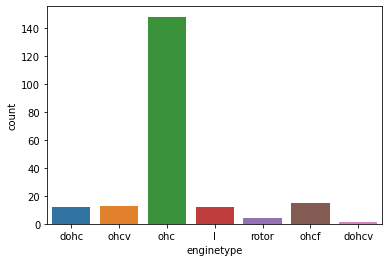

In [14]:
sns.countplot(df_car['enginetype'])

In [17]:
print(df_car['carbody'].value_counts())

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carbody', ylabel='count'>

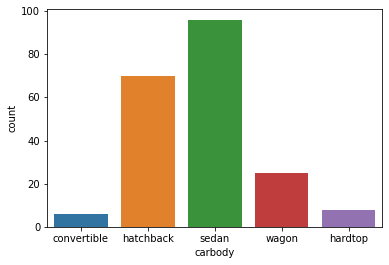

In [18]:
sns.countplot(df_car['carbody'])

In [19]:
print(df_car['fueltype'].value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fueltype', ylabel='count'>

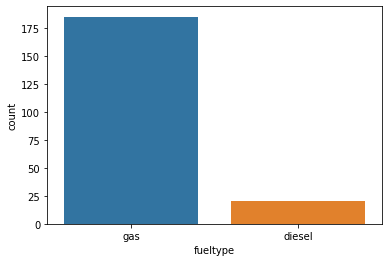

In [20]:
sns.countplot(df_car['fueltype'])

In [21]:
print(df_car['doornumber'].value_counts())

four    115
two      90
Name: doornumber, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='doornumber', ylabel='count'>

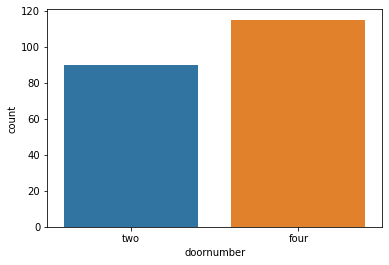

In [22]:
sns.countplot(df_car['doornumber'])

In [25]:
print(df_car['enginelocation'].value_counts())

front    202
rear       3
Name: enginelocation, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enginelocation', ylabel='count'>

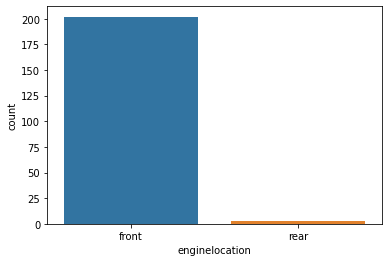

In [26]:
sns.countplot(df_car['enginelocation'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


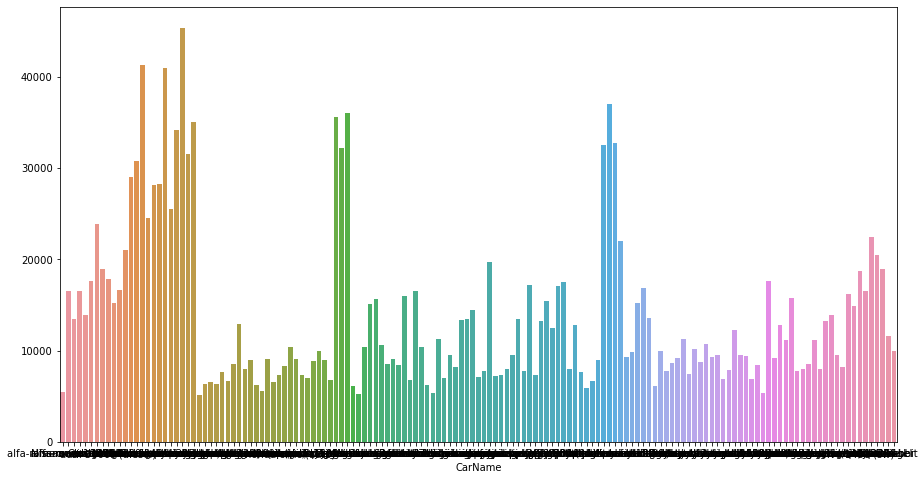

In [28]:
plt.figure(figsize=(15, 8))
# Plot the mean price of each car
price = sns.barplot(df_car.groupby('CarName').mean()['price'].index, df_car.groupby('CarName').mean()['price'].values)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


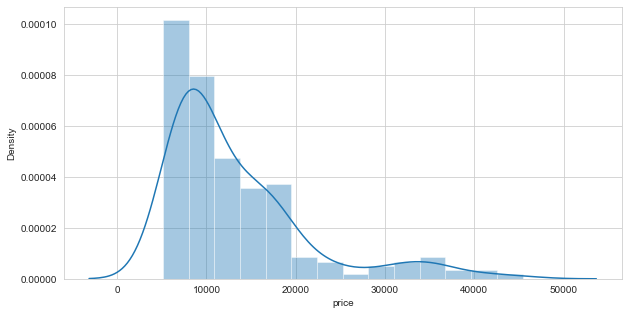

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.distplot(df_car.price)
plt.show()

## Correlation among all the features of the dataset

In [30]:
print(df_car.corr())

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -

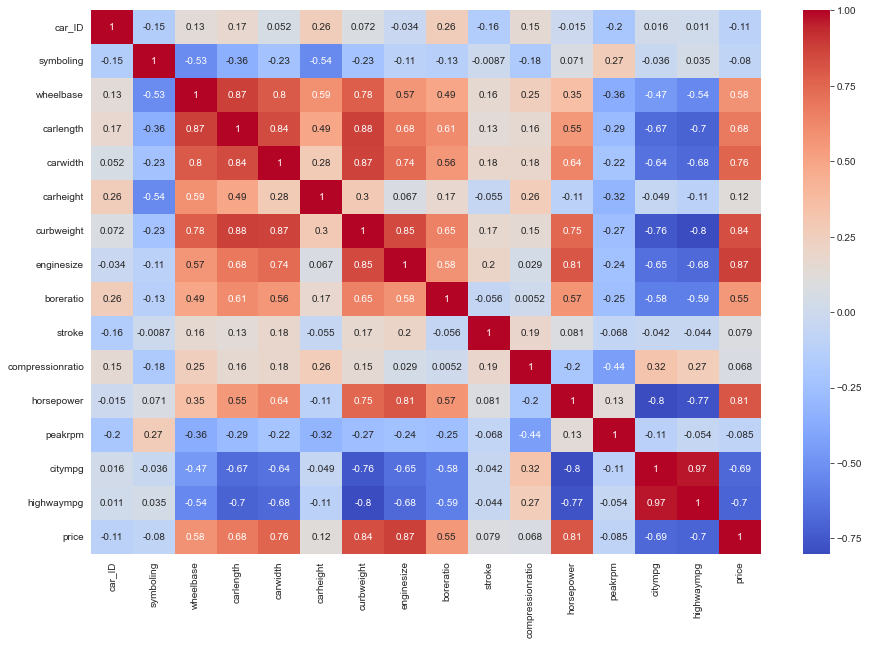

In [32]:
plt.figure(figsize=(15, 10))
correlations = df_car.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [34]:
## As part of the data cleaning process, we have to convert text data to numerical because computers understand only numbers
label_encoder = preprocessing.LabelEncoder()

# Three columns have categorical text info, and we convert them to numbers
df_car['CarName'] = label_encoder.fit_transform(df_car['CarName'])
df_car['fueltype'] = label_encoder.fit_transform(df_car['fueltype'])
df_car['aspiration'] = label_encoder.fit_transform(df_car['aspiration'])
df_car['doornumber'] = label_encoder.fit_transform(df_car['doornumber'])
df_car['carbody'] = label_encoder.fit_transform(df_car['carbody'])
df_car['drivewheel'] = label_encoder.fit_transform(df_car['drivewheel'])
df_car['enginelocation'] = label_encoder.fit_transform(df_car['enginelocation'])
df_car['enginetype'] = label_encoder.fit_transform(df_car['enginetype'])
df_car['cylindernumber'] = label_encoder.fit_transform(df_car['cylindernumber'])
df_car['fuelsystem'] = label_encoder.fit_transform(df_car['fuelsystem'])

In [35]:
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [38]:
y = df_car['price']

# Removing the columns we are not interested in
df_car.drop(['enginelocation','aspiration','carbody','wheelbase','symboling','car_ID','stroke','compressionratio'],axis=1, inplace=True)

# Saving the rest of the data as input data
X = df_car

In [41]:
# List of variables that our machine learning algorithm is going to look at:
X.columns

Index(['CarName', 'fueltype', 'doornumber', 'drivewheel', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'],
      dtype='object')

In [46]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.83822103,  0.32879797,  1.13038833, ..., -0.64655303,
        -0.54605874,  0.02739114],
       [-1.81377978,  0.32879797,  1.13038833, ..., -0.64655303,
        -0.54605874,  0.4044611 ],
       [-1.86266229,  0.32879797,  1.13038833, ..., -0.95301169,
        -0.69162706,  0.4044611 ],
       ...,
       [ 1.53467254,  0.32879797, -0.88465174, ..., -1.10624102,
        -1.12833203,  1.02998314],
       [ 1.58355505, -3.04138127, -0.88465174, ...,  0.11959362,
        -0.54605874,  1.15358178],
       [ 1.60799631,  0.32879797, -0.88465174, ..., -0.95301169,
        -0.83719538,  1.17303131]])

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state =0)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()

In [54]:
model.fit(X_train,y_train)

LinearRegression()

In [55]:
print(model.intercept_)
print(model.coef_)

13276.710570731704
[-1.18580836e-12  7.97766198e-13 -5.26652508e-12  2.49378197e-12
 -1.95043202e-12  1.90588636e-12  1.02192797e-11  3.46031642e-13
 -1.56038843e-12 -8.64076571e-13  2.21878869e-12  2.11521269e-12
 -3.65152934e-12 -2.86731544e-12 -7.40967779e-12  1.30096926e-12
  2.83879877e-12  7.96934351e+03]


In [56]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [57]:
predictions = model.predict(X_val)
predictions

array([ 6795. , 15750. , 15250. ,  5151. ,  9995. , 11199. ,  5389. ,
        7898. , 17199. ,  6529. , 20970. , 31400.5, 10945. , 18344. ,
        8916.5,  9989. ,  9295. , 18920. ,  7895. ,  6488. ,  9959. ,
       15580. ,  9895. , 11549. , 15998. ,  5118. ,  6938. , 16695. ,
        8358. ,  5499. ,  7975. , 12290. , 22018. ,  8948. ,  6849. ,
       41315. , 11595. , 18150. ,  6377. , 45400. ,  8916.5, 17450. ,
       34184. , 15040. , 11259. ,  7609. ,  7609. , 14869. , 11694. ,
        8495. , 23875. ,  7099. ,  8058. , 10595. , 16503. , 18399. ,
       10795. , 18420. ,  9960. ,  6229. ,  6479. , 15510. ])

In [58]:
print(model.score(X_val,y_val))

1.0
